# Лабораторная работа №1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from matplotlib.lines import Line2D
%matplotlib inline

## 1.	Загрузите данные в ноутбук

In [2]:
data = pd.read_excel('Вариант 3.xlsx', header = 2)
data.head()

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
0,1.0,152.0,11,М,333.0,----001---00---000--1-+0---,0(3)0(3)0(3)0(3)0(3),NaN,3.0,10.0,36.0
1,2.0,140.0,12,Ж,332.0,----100---01-+-000--0--1---,0(3)0(3)0(3)0(3)0(3),NaN,4.0,14.0,36.0
2,3.0,137.0,11,М,328.0,--+-010---00---101--0--1---,0(3)0(3)0(3)0(3)0(3),NaN,5.0,17.0,36.0
3,4.0,148.0,11,М,333.0,-+--000--+01---100--0--1---,0(3)0(3)0(3)0(3)0(3),NaN,5.0,17.0,36.0
4,5.0,153.0,11,Ж,333.0,-+--100---00---100-+0--1---,0(3)0(3)0(3)0(3)0(3),NaN,5.0,17.0,36.0


## 2.	Сделайте описательную статистику по среднему баллу

In [3]:
data['Балл'].describe()

count    1180.000000
mean       52.047458
std        14.965477
min        10.000000
25%        41.000000
50%        49.000000
75%        60.250000
max       100.000000
Name: Балл, dtype: float64

## 3.	Найдите процент учащихся, выполнивших работу ниже среднего

In [4]:
print(f"Процент учащихся, набравших меньше среднего = {sum(data['Балл'] < data['Балл'].mean())/data['Балл'].count()*100: .2f}%") 

Процент учащихся, набравших меньше среднего =  56.27%


## 4.	Найти процент учащихся не сдавших экзамен

In [5]:
ns = sum(data['Балл'] < data['Минимальный балл'])/data['Балл'].count()*100
print(f"Процент учащихся, не сдавших экзамен = {ns: .2f}%") 

Процент учащихся, не сдавших экзамен =  7.71%


## 5.	Постройте круговую диаграмму, показывающую распределение сдавших и не сдавших экзамен

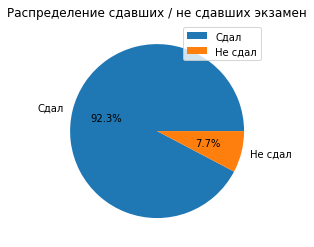

In [6]:
plt.pie([100 - ns, ns], labels=['Сдал', 'Не сдал'], autopct='%1.1f%%')
plt.title('Распределение сдавших / не сдавших экзамен')
plt.legend()

## 6.	Постройте гистограмму по распределению баллов за экзамен. Соответствует ли оно нормальному распределению?

Text(0.5, 1.0, 'Гистограмма распределение баллов за экзамен')

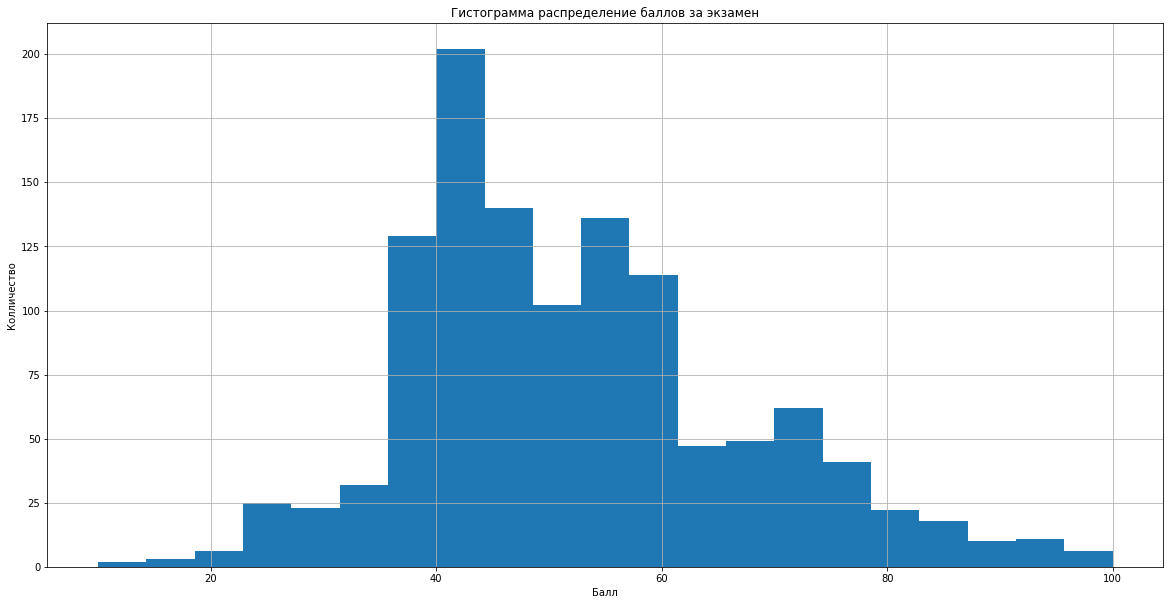

In [7]:
data['Балл'].hist(bins=21, figsize=(20, 10))
plt.xlabel('Балл')
plt.ylabel('Колличество')
plt.title('Гистограмма распределение баллов за экзамен')

__Нормальному распределению ...

## 7.	Постройте оценку ядерной плотности распределению баллов за экзамен

Text(0.5, 1.0, 'Оценка ядерной плотности распределения баллов за экзамен')

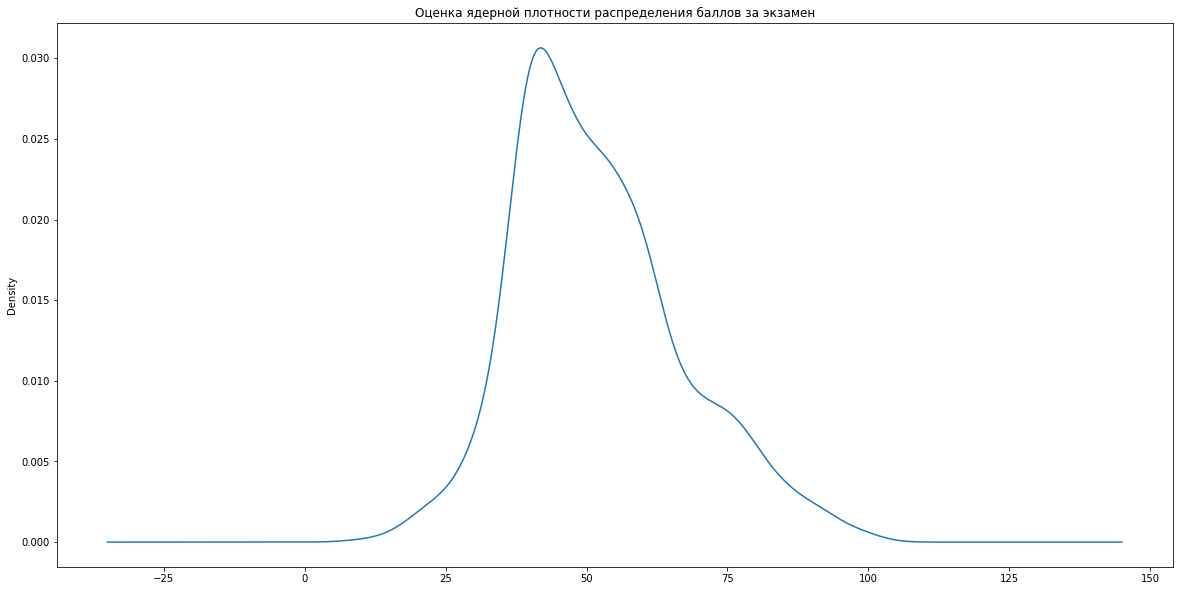

In [8]:
data['Балл'].plot.kde(figsize=(20, 10))
plt.title('Оценка ядерной плотности распределения баллов за экзамен')

## 8.	Найдите процентное соотношение учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно». Сделайте графическое представление данного распределения

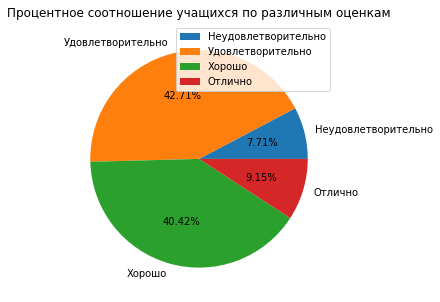

In [9]:
d = [data[data['Балл'] <= 35]['Балл'].count()/data['Балл'].count()*100,
data[ (data['Балл'] > 35) & (data['Балл'] <= 50)]['Балл'].count()/data['Балл'].count()*100,
data[(data['Балл'] > 50) & (data['Балл'] <= 75)]['Балл'].count()/data['Балл'].count()*100,
data[(data['Балл'] > 75)]['Балл'].count()/data['Балл'].count()*100]
fig, ax = plt.subplots(figsize=(10, 5))
ax.pie(d, labels=['Неудовлетворительно', 'Удовлетворительно', 'Хорошо', 'Отлично'], autopct='%1.2f%%')
ax.set_title('Процентное соотношение учащихся по различным оценкам')
plt.legend()

In [10]:
def mark(x):
    if 0 <= x <= 35:
        return 'Неудовлетворительно'
    elif 36 <= x <= 50:
        return 'Удовлетворительно'
    elif 51 <= x <= 75:
        return 'Хорошо'
    elif 76 <= x:
        return 'Отлично'

In [11]:
data['Оценка'] = data['Балл'].map(lambda x: mark(x))

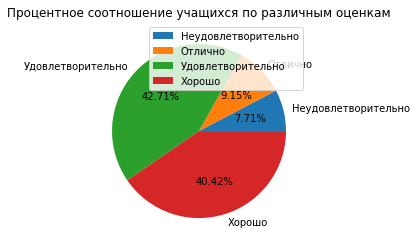

In [12]:
plt.pie(data.groupby(['Оценка'])['Балл'].count()/data['Балл'].count()*100, autopct='%1.2f%%', labels=data.groupby(['Оценка'])['Балл'].count().index)
plt.title('Процентное соотношение учащихся по различным оценкам')
plt.legend()

## 9.	Постройте «ящиковые диаграммы», сравнивающие баллы учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно»

Text(0, 0.5, 'Балл')

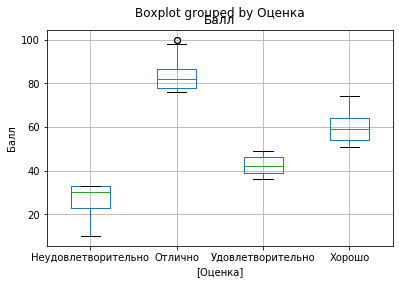

In [13]:
data[['Оценка', 'Балл']].boxplot(by='Оценка')
plt.ylabel('Балл')

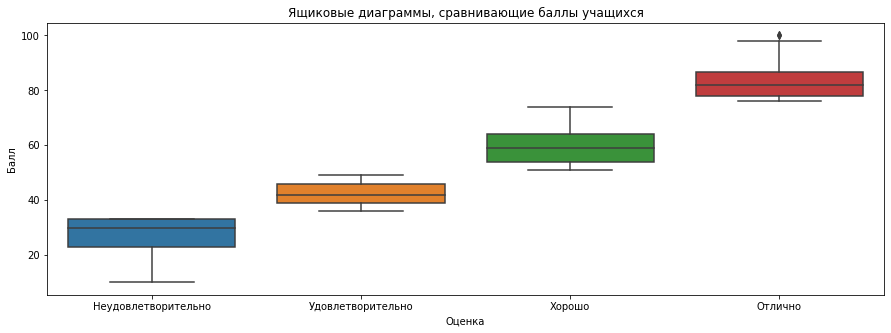

In [14]:
plt.figure(figsize=(15,5))
sns.boxplot(x=data['Оценка'], y=data['Балл'])
plt.title('Ящиковые диаграммы, сравнивающие баллы учащихся')
plt.show()

## 10.	Какое процентное соотношение юношей и девушек писало данный экзамен? Представьте графически

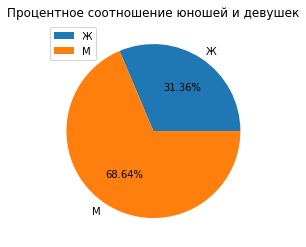

In [15]:
plt.pie(data.groupby('Пол')['№'].count()/data['№'].count()*100, labels=['Ж', 'М'], autopct='%1.2f%%')
plt.title('Процентное соотношение юношей и девушек')
plt.legend()

## 11.	Постройте диаграмму рассеивания, позволяющую увидеть средние баллы девушек и юношей

Text(0.5, 1.0, 'Диаграмма рассеивания, позволяющая увидеть средние баллы девушек и юношей')

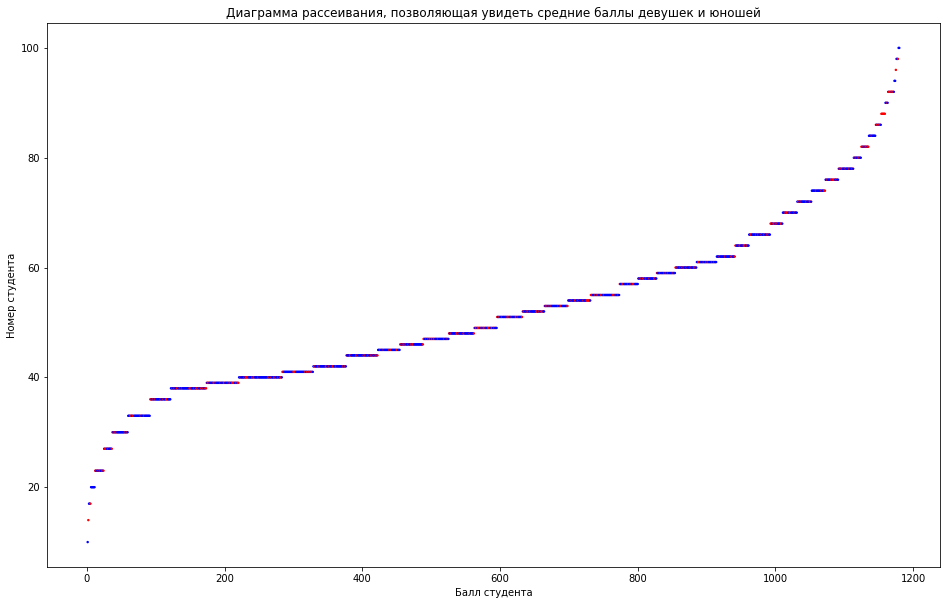

In [16]:
plt.figure(figsize=(16, 10)) 
sc = plt.scatter(data['№'], data['Балл'], c=np.where(data['Пол']=='М', 'blue', 'red'), s=2)
plt.xlabel('Балл студента')
plt.ylabel('Номер студента')
plt.title('Диаграмма рассеивания, позволяющая увидеть средние баллы девушек и юношей')

## 12.	Сколько школ (код ППЕ) принимало участие в экзамене?

In [17]:
print(f"В экзамене принимало участие {len(data['№ школы'].value_counts())} школ") 

В экзамене принимало участие 19 школ


## 13.	Постройте диаграмму, позволяющую сравнить средние баллы за экзамен по школам. Если какие-нибудь выбросы?

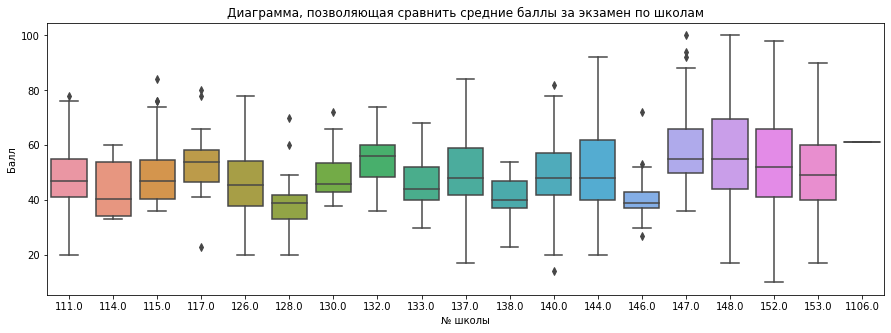

In [18]:
plt.figure(figsize=(15,5))
sns.boxplot(x=data['№ школы'], y=data['Балл'])
plt.title('Диаграмма, позволяющая сравнить средние баллы за экзамен по школам')
plt.show()

Да, выбросы имеются, например в 147 школе сильно выделяется ученик, набравший 100 баллов. В других школах также имеются выбросы

# __Повышенной сложности:__

## 1.	Сколько всего заданий с кратким ответом? С развернутым ответом?

In [19]:
print(f"Всего {len(data['Задания с кратким ответом'][0])} заданий с кратким ответов") 
print(f"Всего {len(data['Задания с развёрнутым ответом'][0].replace('(3)',''))} заданий с развернутым ответов") 

Всего 27 заданий с кратким ответов
Всего 5 заданий с развернутым ответов


## 2.	Пусть задания с кратким ответом будут задания типа В. Соответственно всего по экзамену вопросов класса В: В1 … Вк  Посчитайте процент выполненных и невыполненных заданий по каждому вопросу класса В. Постройте гистограмму, позволяющую увидеть данное распределение. Какие есть выпады по данному распределению?

In [20]:
tasksB = pd.DataFrame()
for i in range(len(data['Задания с кратким ответом'][0])):
    tasksB['B'+str(i+1)] = data['Задания с кратким ответом'].map(lambda x: 0 if (x[i]=="-" or x[i] == '0') else 1, na_action='ignore')
tasksB.dropna(inplace=True)   

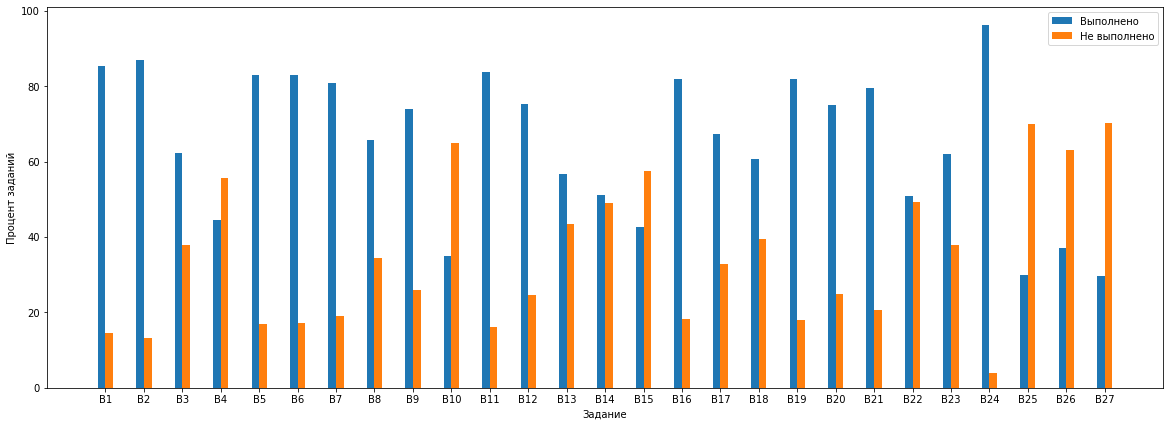

In [21]:
solvedB = tasksB.sum(axis=0)/len(tasksB)*100
unsolvedB = 100 - solvedB

x = np.arange(len(tasksB.columns))
width= 0.2
fig, ax = plt.subplots(figsize=(20, 7))
ax.bar(x - width/2, solvedB, width, label='Выполнено')
ax.bar(x + width/2, unsolvedB, width, label='Не выполнено')
ax.set_ylabel('Процент заданий')
ax.set_xlabel('Задание')
ax.set_xticks(x)
ax.set_xticklabels(tasksB.columns)
ax.legend()

Из явных выпадов видно, что с заданием B24 справилось подавляющее большинство сдававших

## 3.	Аналогично и с типом С (ответы с развернутым ответом)

In [22]:
tasksC = pd.DataFrame()
for i in range(len(data['Задания с развёрнутым ответом'][0].replace('(3)',''))):
    tasksC['C'+str(i+1)] = data['Задания с развёрнутым ответом'].map(lambda x: int(x.replace('(3)','')[i]), na_action='ignore')
tasksC.dropna(inplace=True)  

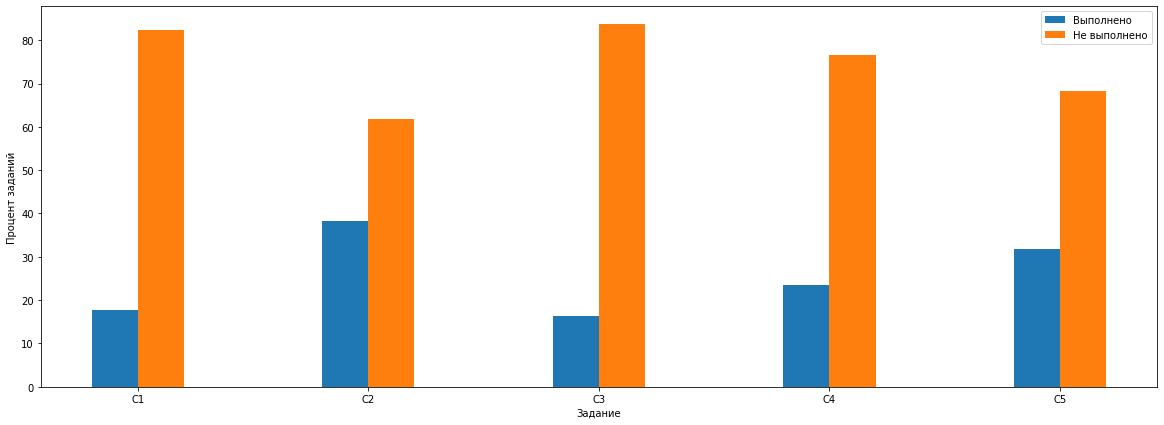

In [23]:
solvedC = tasksC.astype(bool).sum(axis=0)/len(tasksC)*100
unsolvedC = 100 - solvedC

x = np.arange(len(tasksC.columns))
width= 0.2
fig, ax = plt.subplots(figsize=(20, 7))
ax.bar(x - width/2, solvedC, width, label='Выполнено')
ax.bar(x + width/2, unsolvedC, width, label='Не выполнено')
ax.set_ylabel('Процент заданий')
ax.set_xlabel('Задание')
ax.set_xticks(x)
ax.set_xticklabels(tasksC.columns)
ax.legend()

Явных выпадов не видно, но можно заметить, что с C2 справляется больше людей, чем с остальными задачами

## 4.	Сделайте анализ по двум школам:
* А) по всем выполненным заданиям типа В
* Б) по заданиям типа С больше 50%
* В) по среднему балу юношей и девушек


In [24]:
data.groupby('№ школы')['№'].count().sort_values(ascending=False)

№ школы
148.0     214
152.0     170
140.0     135
153.0     129
137.0      72
147.0      67
111.0      63
144.0      61
126.0      56
133.0      49
115.0      43
117.0      32
146.0      23
132.0      18
128.0      15
138.0      11
130.0      11
114.0      10
1106.0      1
Name: №, dtype: int64

In [25]:
first_school, second_school = 140, 153

In [26]:
tasksB_fs = tasksB[data['№ школы'] ==first_school] 
tasksB_ss = tasksB[data['№ школы'] ==second_school] 
solved_fs = tasksB_fs.sum(axis=0)/len(tasksB_fs)*100
solved_ss = tasksB_ss.sum(axis=0)/len(tasksB_ss)*100

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


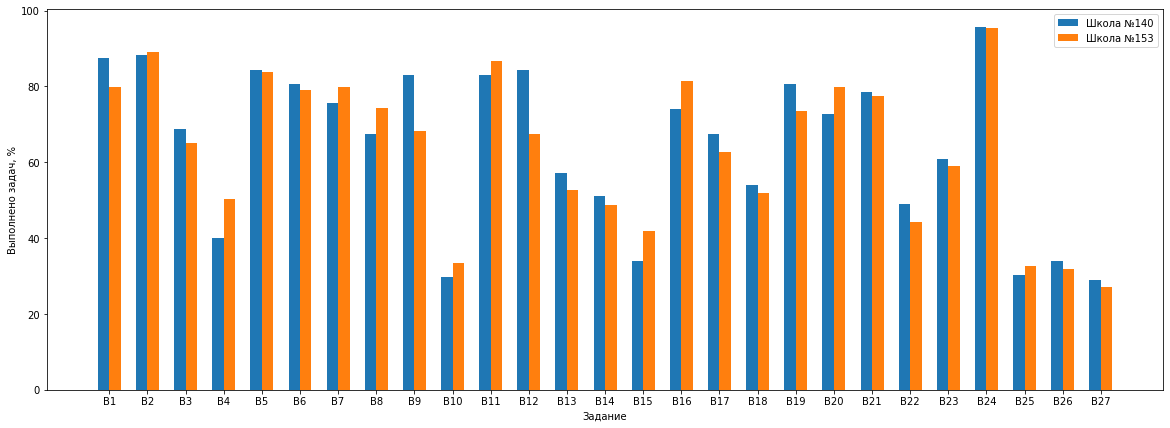

In [27]:
x = np.arange(len(tasksB.columns))
width= 0.3
fig, ax = plt.subplots(figsize=(20, 7))
ax.bar(x - width/2, solved_fs, width, label='Школа №'+str(first_school))
ax.bar(x + width/2, solved_ss, width, label='Школа №'+str(second_school))
ax.set_ylabel('Выполнено задач, %')
ax.set_xlabel('Задание')
ax.set_xticks(x)
ax.set_xticklabels(tasksB.columns)
ax.legend()

### Б) по заданиям типа С больше 50%

In [28]:
tasksC_fs = tasksC[data['№ школы'] ==first_school] 
tasksC_ss = tasksC[data['№ школы'] ==second_school] 
solvedC_fs = tasksC_fs[tasksC_fs/3*100 >50].count()/len(tasksC_fs)*100
solvedC_ss = tasksC_ss[tasksC_ss/3*100 >50].count()/len(tasksC_ss)*100

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


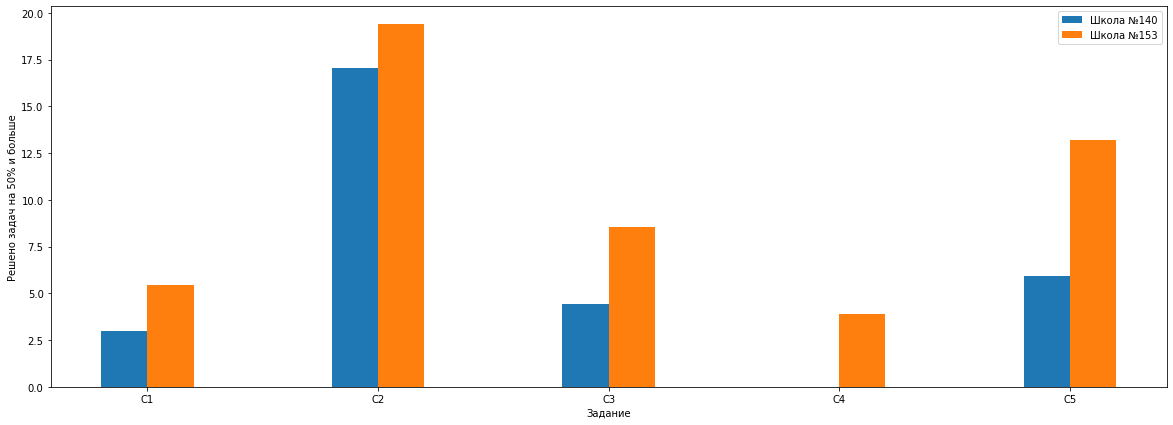

In [29]:
x = np.arange(len(tasksC.columns))
width= 0.2
fig, ax = plt.subplots(figsize=(20, 7))
ax.bar(x - width/2, solvedC_fs, width, label='Школа №'+str(first_school))
ax.bar(x + width/2, solvedC_ss, width, label='Школа №'+str(second_school))
ax.set_ylabel('Решено задач на 50% и больше')
ax.set_xlabel('Задание')
ax.set_xticks(x)
ax.set_xticklabels(tasksC.columns)
ax.legend()

В школе №140 никто не решил С4 более, чем на 50%

### в) по среднему балу юношей и девушек

In [30]:
score_fs = data[data['№ школы'] ==first_school][['Балл', 'Пол']]
score_ss = data[data['№ школы'] ==second_school][['Балл', 'Пол']] 
fs_mean = score_fs.groupby('Пол')['Балл'].mean()
ss_mean = score_ss.groupby('Пол')['Балл'].mean()

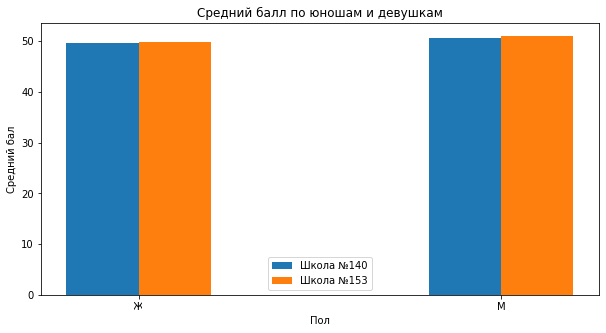

In [31]:
x = np.arange(len(fs_mean))
width= 0.2
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x - width/2, fs_mean, width, label='Школа №'+str(first_school))
ax.bar(x + width/2, ss_mean, width, label='Школа №'+str(second_school))
ax.set_ylabel('Средний бал')
ax.set_xlabel('Пол')
ax.set_xticks(x)
ax.set_xticklabels(fs_mean.index)
ax.set_title('Средний балл по юношам и девушкам')
ax.legend()